**Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.**

### Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class

Import data

In [21]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
mnist.target = mnist.target.astype(np.uint8)

Take sample

In [22]:
# Take only 10,000 instances to reduce
import numpy as np
index = np.random.permutation(60000)[:1000]

X = mnist.data[index]
y = mnist.target[index]

Run with TSNE

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_red = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Make plot

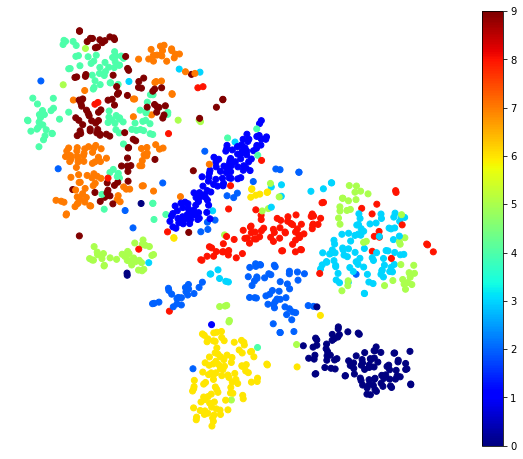

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
colors = np.array(["darkred", "red", "orange", "salmon", "lightpink", "pink",
                   "purple", "lightblue", "blue", "darkblue"])
plt.scatter(X_red[:, 0], X_red[:, 1], c=y.astype(int), cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

### Alternate view with many types of dimensionality reduction

Define function to plot 

In [96]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl

def plot_digits(X, y, axs, name="", min_distance=0.1):
  X_norm = MinMaxScaler().fit_transform(X)
  neighbors = np.array([[10.,10.]])
  cmap = mpl.cm.get_cmap("jet")
  digits = np.unique(y)
  for digit in digits:
    axs.scatter(X_norm[y == digit, 0], X_norm[y == digit, 1], c=[cmap(digit / 9)])
  axs.axis("off")
  axs.set_title(name)
  ax = plt.gcf().gca()
  for index, image_coord in enumerate(X_norm):
    closest_d = np.linalg.norm(neighbors - image_coord, axis=1).min()
    if closest_d > min_distance:
      neighbors = np.r_[neighbors, [image_coord]]
      axs.text(image_coord[0], image_coord[1], str(int(y[index])), fontdict={"weight": "bold", "size":16})

Define models

In [97]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS

tsne = TSNE(n_components=2)
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)
mds = MDS(n_components=2)

Show subplot for each type of dimensionality reduction.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


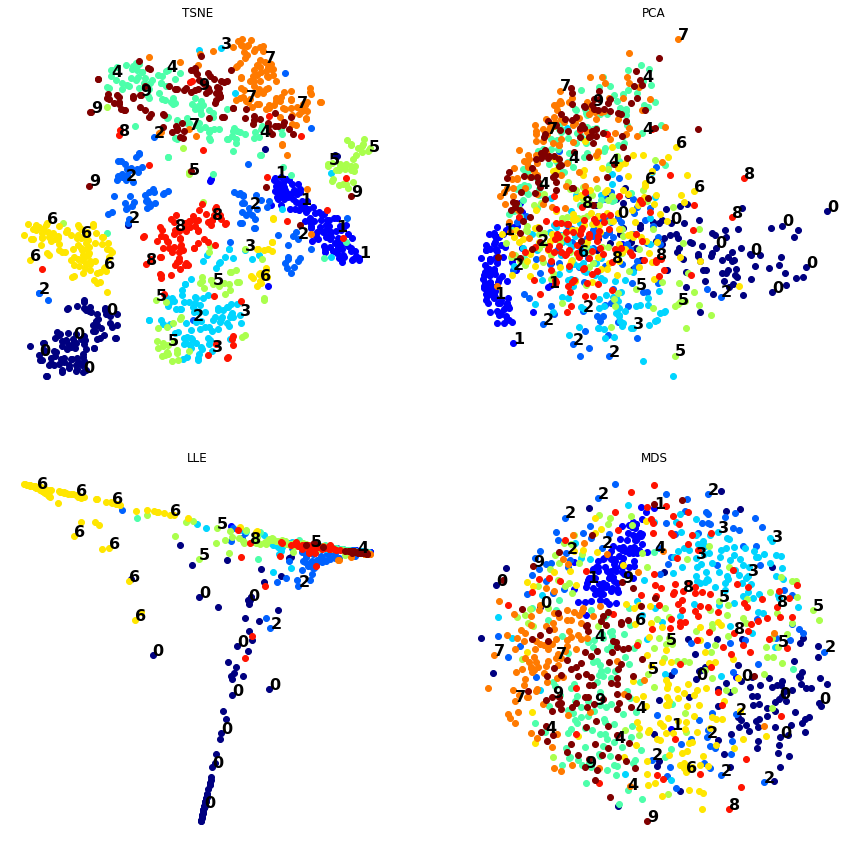

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharey=True)

axis = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
models = [tsne, pca, lle, mds]
names = ["TSNE", "PCA", "LLE", "MDS"]

for model,axs,name in zip(models, axis, names):
  plot_digits(model.fit_transform(X), y, axs=axs, name=name)

### Results

Consdering just the raw models (desconsidering the option to blend two models together, both reducing dimensionality but one at a time), the most performing of them appears to be TSNE. Although some numbers such as 2 or 4 appears to blend with others numbers, it was the model that gave us the best clusterization of all numbers. \\
Let's try once more joining TSNE and PCA, preserving the data's variability with PCA and reducing dimensionality roughly with TSNE.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


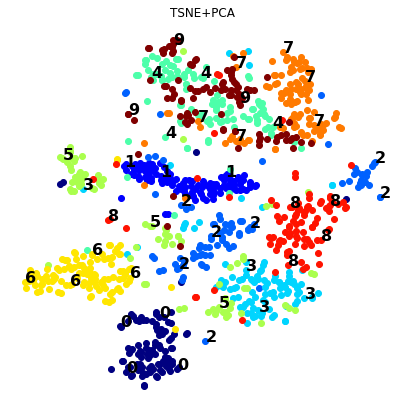

In [114]:
from sklearn.pipeline import Pipeline

tsne_pca = Pipeline([
                     ("pca", PCA(n_components=0.95, random_state=42)),
                     ("tsne", TSNE(n_components=2, random_state=42))
])
X_red_final = tsne_pca.fit_transform(X)
fig, axs = plt.subplots(1, 1, figsize=(7, 7), sharey=True)
plot_digits(X_red_final, y, axs=axs, name="TSNE+PCA")